In [1]:
import xarray as xr


In [2]:
f= '/proj/bolinc/users/x_sarbl/other_data/BS-FDBCK/ECHAM-SALSA/SALSA_BSOA_feedback/SALSA_BSOA_feedback_201301_ORG_mass.nc'


In [3]:
ds = xr.open_dataset(f)

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
(click 8.0.1 (/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages), Requirement.parse('click<8,>=4.0'), {'rasterio'})
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


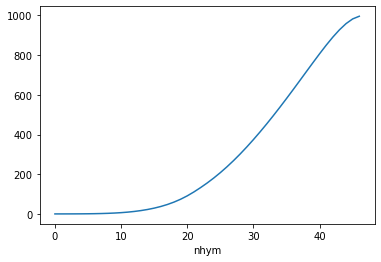

In [13]:
lev = (ds['hyam'] + ds['hybm']*100000)*1e-2

lev.plot()

In [14]:
lev.isel(nhym=-1)

<xarray.DataArray ()>
array(996.15)

In [15]:
lev.isel(nhym=-2)

<xarray.DataArray ()>
array(982.65)

In [16]:
lev.isel(nhym=-3)

<xarray.DataArray ()>
array(958.960318)

In [17]:
lev.isel(nhym=-4)

<xarray.DataArray ()>
array(927.6684505)

In [18]:
f2 = '/proj/bolinc/users/x_sarbl/noresm_archive/OsloAero_intBVOC_f09_f09_mg17_ssp245/atm/hist/OsloAero_intBVOC_f09_f09_mg17_ssp245.cam.h0.2017-01.nc'

In [19]:
ds_n = xr.open_dataset(f2)

In [20]:
ds_n['lev']

<xarray.DataArray 'lev' (lev: 32)>
array([  3.643466,   7.59482 ,  14.356632,  24.61222 ,  35.92325 ,  43.19375 ,
        51.677499,  61.520498,  73.750958,  87.82123 , 103.317127, 121.547241,
       142.994039, 168.22508 , 197.908087, 232.828619, 273.910817, 322.241902,
       379.100904, 445.992574, 524.687175, 609.778695, 691.38943 , 763.404481,
       820.858369, 859.534767, 887.020249, 912.644547, 936.198398, 957.48548 ,
       976.325407, 992.556095])
Coordinates:
  * lev      (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
Attributes:
    long_name:      hybrid level at midpoints (1000*(A+B))
    units:          hPa
    positive:       down
    standard_name:  atmosphere_hybrid_sigma_pressure_coordinate
    formula_terms:  a: hyam b: hybm p0: P0 ps: PS

In [23]:
ds_n['lev'].isel(lev=-1)

<xarray.DataArray 'lev' ()>
array(992.55609512)
Coordinates:
    lev      float64 992.6
Attributes:
    long_name:      hybrid level at midpoints (1000*(A+B))
    units:          hPa
    positive:       down
    standard_name:  atmosphere_hybrid_sigma_pressure_coordinate
    formula_terms:  a: hyam b: hybm p0: P0 ps: PS

In [24]:
ds_n['lev'].isel(lev=-2)

<xarray.DataArray 'lev' ()>
array(976.32540739)
Coordinates:
    lev      float64 976.3
Attributes:
    long_name:      hybrid level at midpoints (1000*(A+B))
    units:          hPa
    positive:       down
    standard_name:  atmosphere_hybrid_sigma_pressure_coordinate
    formula_terms:  a: hyam b: hybm p0: P0 ps: PS

In [40]:
ds_n['lev'].isel(lev=-2)

<xarray.DataArray 'lev' ()>
array(976.32540739)
Coordinates:
    lev      float64 976.3
Attributes:
    long_name:      hybrid level at midpoints (1000*(A+B))
    units:          hPa
    positive:       down
    standard_name:  atmosphere_hybrid_sigma_pressure_coordinate
    formula_terms:  a: hyam b: hybm p0: P0 ps: PS

In [34]:
import metpy.calc
import metpy.units

In [42]:
metpy.calc.pressure_to_height_std(97632.540739*metpy.units.units('Pa'))

0.31183722694433086 <Unit('kilometer')>

In [44]:
metpy.calc.height_to_pressure_std(125*metpy.units.units('meter'))

998.3153875463462 <Unit('hectopascal')>

In [47]:
ds_n['P0']

<xarray.DataArray 'P0' ()>
array(100000.)
Attributes:
    long_name:  reference pressure
    units:      Pa

In [56]:
lev_n = ds_n['hyam']*1e5 + ds_n['hybm']*99831.53875463462

In [65]:
lev_ni = ds_n['hyai']*1e5 + ds_n['hybi']*99831.53875463462

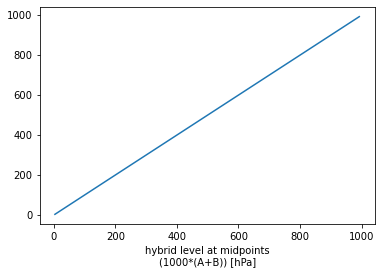

In [57]:
(lev_n*1e-2).plot()

In [71]:
lev_ni.isel(ilev=-2)

<xarray.DataArray ()>
array(98345.26579826)
Coordinates:
    ilev     float64 985.1

In [70]:
lev_ni.isel(ilev=-1)

<xarray.DataArray ()>
array(99831.53875463)
Coordinates:
    ilev     float64 1e+03

In [60]:
metpy.calc.pressure_to_height_std(99088.40227645*metpy.units.units('Pa'))

0.18776423403194378 <Unit('kilometer')>

In [62]:
metpy.calc.pressure_to_height_std(97468.40288346*metpy.units.units('Pa'))

0.32591935109832204 <Unit('kilometer')>

In [73]:
(
    metpy.calc.pressure_to_height_std(lev_ni.isel(ilev=-2)*metpy.units.units('Pa'))
    -
    metpy.calc.pressure_to_height_std(lev_ni.isel(ilev=-1)*metpy.units.units('Pa'))

)

<xarray.DataArray ()>
<Quantity(0.12591079, 'kilometer')>

In [75]:
(
    metpy.calc.pressure_to_height_std(lev_ni.isel(ilev=-4)*metpy.units.units('Pa'))
    -
    metpy.calc.pressure_to_height_std(lev_ni.isel(ilev=-1)*metpy.units.units('Pa'))

)

<xarray.DataArray ()>
<Quantity(0.451481324, 'kilometer')>

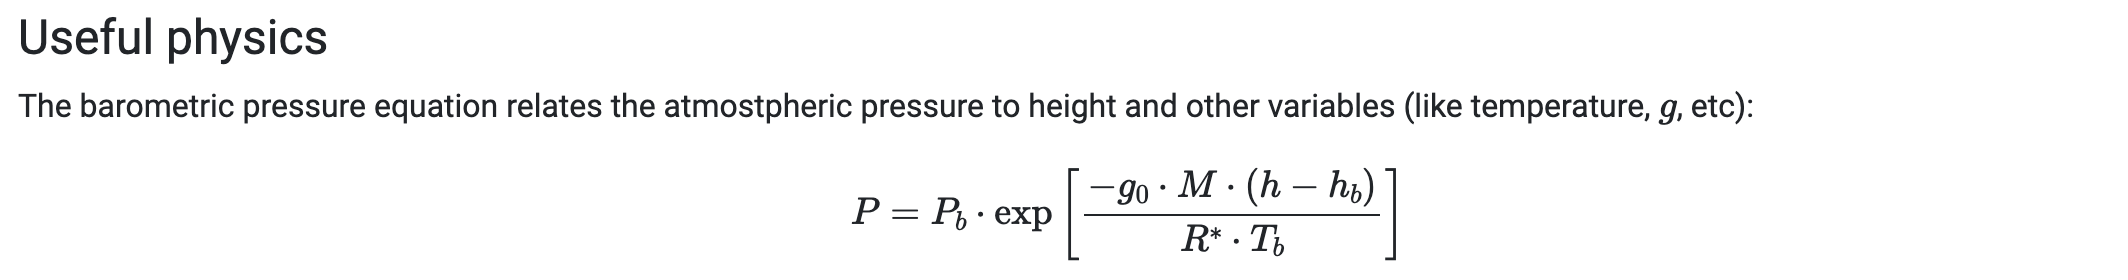

In [85]:
R_s = 8.3144598 #J/(mol  K)
g0 = 9.80 #m/s2
M = 0.0289644 #kg/mol

In [88]:
import numpy as np

In [89]:
def barometric_press2height(pres, pres_b,  temp_b):
    R_s
    term1 = np.log(pres/pres_b)*R_s*temp_b
    term2 = -g0*M
    return term1/term2
    

In [95]:
for i in range(1,6):
    #print(i,metpy.calc.pressure_to_height_std(lev_ni.isel(ilev=-i)*metpy.units.units('Pa')).values)
    print(i,
          barometric_press2height(
              lev_ni.isel(ilev=-i).values, 
              lev_ni.isel(ilev=-1).values, 
                                     (273.15+30)
                                    )
          
          )


1 -0.0
2 133.19407027092083
3 292.9697095606733
4 479.36972612202953
5 692.3999635911791


In [81]:
for i in range(1,6):
    #print(i,metpy.calc.pressure_to_height_std(lev_ni.isel(ilev=-i)*metpy.units.units('Pa')).values)
    print(i,
          (
              metpy.calc.pressure_to_height_std(lev_ni.isel(ilev=-i)*metpy.units.units('Pa')).values
              -
              metpy.calc.pressure_to_height_std(lev_ni.isel(ilev=-1)*metpy.units.units('Pa')).values
              
          )
          )


1 0.0
2 0.12591078975008688
3 0.2764763353837426
4 0.4514813244354906
5 0.65063458288666


In [75]:
(
    metpy.calc.pressure_to_height_std(lev_ni.isel(ilev=-4)*metpy.units.units('Pa'))
    -
    metpy.calc.pressure_to_height_std(lev_ni.isel(ilev=-1)*metpy.units.units('Pa'))

)

<xarray.DataArray ()>
<Quantity(0.451481324, 'kilometer')>

In [58]:
lev_n

<xarray.DataArray (lev: 32)>
array([  364.3465694 ,   759.48196463,  1435.66322513,  2461.22200042,
        3592.32500196,  4319.37500834,  5167.74989665,  6152.0498246 ,
        7375.09578466,  8782.12302923, 10331.71266317, 12154.72407639,
       14299.40387607, 16822.50797749, 19787.49378862, 23272.33234475,
       27372.06443836, 32195.18767484, 37869.34061497, 44544.68765121,
       52397.88921002, 60889.46109667, 69033.67366544, 76220.30025531,
       81953.81888968, 85813.46803671, 88556.33770818, 91113.47346555,
       93463.99233279, 95588.30247452, 97468.40288346, 99088.40227645])
Coordinates:
  * lev      (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6

In [ ]:
def pres2height(

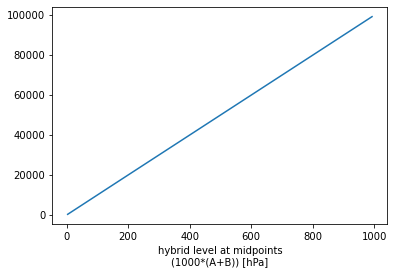

In [55]:
lev_n = ds_n['hyam']*ds_n['P0'] + ds_n['hybm']*998.3153875463462*1e2
lev_n.plot()